In [1]:
import os
import math
import config
import random
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm

from utils import (
    create_img_grid,
    create_img_stack,
    extract_flxion_features,
    SpatialProjection
)

from model import ProjectionNet

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


2022-06-25 20:49:50.212089: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data_dir = "../../data/dataset/raw/"
subjects = os.listdir(data_dir)

augmentation_levels = [0, 9, 7, 11, 13]
sp_augment = [
    SpatialProjection(
    img_dir="../../data/dataset/images/",
    # img_len=math.floor(config.IMG_LEN / 3),
    img_len=config.IMG_LEN,
    polyfit_degree=degree
)
    for degree in augmentation_levels ]

test_subject = "007"


In [3]:
# train_features = []
# train_images = []
# train_labels = []
# test_features = []
# test_images = []
# test_labels = []

# for subject in tqdm(subjects):
#     for gesture in config.GESTURES:
#         gesture_dir = os.path.join(data_dir, subject, gesture)
#         recordings = os.listdir(gesture_dir)
#         for recording in recordings:
#             file_path = os.path.join(gesture_dir, recording)

#             data = pd.read_csv(file_path)
#             data.drop(columns=["time"], inplace=True)
#             data.drop(0, inplace=True)  # Remove first All-0 row

#             if data.shape[0] == 0:
#                 continue

#             # ... Flag for determining Trainning and Testing Samples
#             for_training = random.randint(1, 100) <= 80

#             for sp in sp_augment:
#                 _images = []
#                 for landmark in config.PROJECTION_LANDMARKS:
#                     _images.extend(
#                         sp.get_projection_images(
#                             data=data.filter(regex=landmark),
#                             subject=subject,
#                             gesture=gesture
#                         )
#                     )

#                 _features = extract_flxion_features(data)

#                 # img = create_img_grid(_images, config.IMG_LEN)
#                 img = create_img_stack(_images[:3])

#                 if for_training:
#                     train_features.append(_features)
#                     train_images.append(img)
#                     train_labels.append(config.GESTURES.index(gesture))
#                 else:
#                     test_features.append(_features)
#                     test_images.append(img)
#                     test_labels.append(config.GESTURES.index(gesture))
#                     break

#     #             plt.imshow(img)
#     #             # plt.savefig("../assets/projection_demo.pdf")
#     #             plt.show()

#     #         break
#     #     break
#     # break


In [4]:
# train_features = np.array(train_features)
# train_features.shape

# Stack CNN Config

In [5]:
# train_features = np.array(train_features)
# train_images = np.array(train_images, dtype="uint8")
# test_features = np.array(test_features)
# test_images = np.array(test_images, dtype="uint8")

# X_train = np.split(train_features, len(config.DIST_FEATURES), axis=-1) + \
#     [np.squeeze(img) for img in np.split(train_images, 3, axis=-1)]

# X_test = np.split(test_features, len(config.DIST_FEATURES), axis=-1) + \
#     [np.squeeze(img) for img in np.split(test_images, 3, axis=-1)]

# y_train = np.array(train_labels, dtype="uint8")
# y_test = np.array(test_labels, dtype="uint8")

# print(X_train[0].shape)
# print(X_train[-1].shape)
# print(X_test[0].shape)
# print(X_test[-1].shape)
# print(y_train.shape)
# print(y_test.shape)


In [6]:
# X = np.array(images, dtype="uint8")
# X = np.expand_dims(X[:, :, :, 0], axis=-1)
# # X = np.repeat(np.expand_dims(X, axis=-1), 3, axis=-1)
# y = np.array(labels, dtype="uint8")

# X_train = np.array(train_images, dtype="uint8")
# X_test = np.array(test_images, dtype="uint8")

# y_train = np.array(train_labels, dtype="uint8")
# y_test = np.array(test_labels, dtype="uint8")

# X_train = np.expand_dims(X_train[:, :, :, 0], axis=-1)
# X_test = np.expand_dims(X_test[:, :, :, 0], axis=-1)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [7]:
save_dir = f"../../data/dataset/processed/{test_subject}/"

# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# joblib.dump(X_train, os.path.join(save_dir, "X_train_stack_11.joblib"))
# joblib.dump(y_train, os.path.join(save_dir, "y_train_stcak_11.joblib"))
# joblib.dump(X_test, os.path.join(save_dir, "X_test_stack_11.joblib"))
# joblib.dump(y_test, os.path.join(save_dir, "y_test_stack_11.joblib"))

# Load Data

In [8]:
X_train = joblib.load(os.path.join(save_dir, "X_train_stack_11.joblib"))
y_train = joblib.load(os.path.join(save_dir, "y_train_stcak_11.joblib"))
X_test = joblib.load(os.path.join(save_dir, "X_test_stack_11.joblib"))
y_test = joblib.load(os.path.join(save_dir, "y_test_stack_11.joblib"))

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42
# )


In [10]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(config.IMG_LEN, config.IMG_LEN, 3),
#     include_top=False,
#     weights="imagenet"
# )
# base_model.trainable = True
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = tf.keras.layers.Dense(len(config.GESTURES))

# inputs = tf.keras.Input(shape=(config.IMG_LEN, config.IMG_LEN, 3))
# x = preprocess_input(inputs)
# x = base_model(x, training=True)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.6)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs)


In [11]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Rescaling(
#         1/255.0,
#         input_shape=(config.IMG_LEN, config.IMG_LEN, config.N_CHANNELS)
#     ),
#     tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
#     tf.keras.layers.MaxPool2D((2, 2)),
#     tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
#     tf.keras.layers.MaxPool2D((2, 2)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#     tf.keras.layers.MaxPool2D((2, 2)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#     tf.keras.layers.MaxPool2D((2, 2)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(len(config.GESTURES))
# ])


In [12]:
# import config
# from model import ConvMixer

# model = ConvMixer(
#     img_size=config.IMG_LEN,
#     in_channels=1,
#     n_classes=len(config.GESTURES),
#     n_filters=64,
#     depth=3,
#     kernel_size=5,
#     patch_size=2
# ).model()



In [13]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(config.IMG_LEN, config.IMG_LEN, config.N_CHANNELS),
    include_top=False,
    weights="imagenet"
)

# model = ProjectionNet(
#     n_classes=len(config.GESTURES),
#     base_model=base_model,
#     n_feature_vectors=6
# ).model()

model = ProjectionNet(
    img_size=config.IMG_LEN,
    segment_len=config.SEGMENT_LEN,
    n_classes=len(config.GESTURES),
    base_model=base_model
).get_model(
    n_projections=config.N_CHANNELS,
    n_channels=len(config.DIST_FEATURES)
)

model.summary()


2022-06-25 20:49:52.394383: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-25 20:49:52.394416: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Andromeda
2022-06-25 20:49:52.394419: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Andromeda
2022-06-25 20:49:52.394523: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-06-25 20:49:52.394535: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-06-25 20:49:52.394538: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2022-06-25 20:49:52.394761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions i

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 1)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 150, 1)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 150, 1)]     0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 150, 1)]     0           []                               
                                                                                              

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=config.LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [15]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=30,
        restore_best_weights=True
    )
]

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=700,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/700
147/147 [==============================] - 73s 466ms/step - loss: 1.7800 - accuracy: 0.4394 - val_loss: 0.7914 - val_accuracy: 0.8348
Epoch 2/700
147/147 [==============================] - 67s 454ms/step - loss: 0.6663 - accuracy: 0.7857 - val_loss: 0.3960 - val_accuracy: 0.9018
Epoch 3/700
147/147 [==============================] - 68s 464ms/step - loss: 0.4424 - accuracy: 0.8550 - val_loss: 0.3286 - val_accuracy: 0.8973
Epoch 4/700
147/147 [==============================] - 67s 457ms/step - loss: 0.3816 - accuracy: 0.8742 - val_loss: 0.2723 - val_accuracy: 0.9375
Epoch 5/700
147/147 [==============================] - 66s 450ms/step - loss: 0.3061 - accuracy: 0.8967 - val_loss: 0.2478 - val_accuracy: 0.9196
Epoch 6/700
147/147 [==============================] - 67s 453ms/step - loss: 0.2542 - accuracy: 0.9114 - val_loss: 0.1985 - val_accuracy: 0.9464
Epoch 7/700
147/147 [==============================] - 67s 453ms/step - loss: 0.2369 - accuracy: 0.9189 - val_loss: 0.2282 -

In [16]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 3s 405ms/step - loss: 0.1805 - accuracy: 0.9643


[0.1805466264486313, 0.9642857313156128]

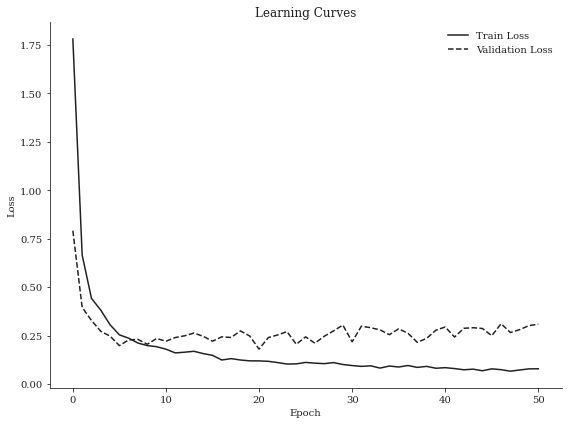

In [17]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "serif",
    # "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "text.color": "#212121",
    "axes.edgecolor": "#212121",
    "xtick.color": "#212121",
    "ytick.color": "#212121",
    "axes.labelcolor": "#212121",
    'legend.frameon': False,
})

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(history.history["loss"], "-", color="#212121", label="Train Loss")
ax.plot(history.history["val_loss"], "--",
        color="#212121", label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Learning Curves")
plt.legend()
plt.tight_layout()
plt.savefig("../assets/lc.png")
plt.show()


In [18]:
# tf.keras.backend.clear_session()
